# 1. Google Colaboratory
https://colab.research.google.com/?utm_source=scs-index#scrollTo=P-H6Lw1vyNNd

## 1-1 GPU 설정

수정> 노트설정 > 하드웨어 가속기 > GPU > 저장

## 1-2 할당된 GPU 정보 확인하기

In [ ]:
!nvidia-smi

Thu Sep 26 02:28:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## 1-3 CUDA Version 확인하기

In [ ]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


# 2. Tensor


## 2.1 PyTorch

Documentation: https://pytorch.org/docs/stable/index.html

PyTorch Tutorial(KOR): https://tutorials.pytorch.kr


Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data (see Bridge with NumPy). Tensors are also optimized for automatic differentiation (we’ll see more about that later in the Autograd section). If you’re familiar with ndarrays, you’ll be right at home with the Tensor API. If not, follow along!

In [ ]:
import torch
import numpy as np

##### 2.1.1 Tensor?

In [ ]:
#리스트 생성
lst = [[1,2], [3,4]]
print(type(lst))
print()

#리스트 --> 넘파이
lst_to_np = np.array(lst)
print(type(lst_to_np))
print()

#리스트 --> 텐서
lst_to_ts = torch.tensor(lst)
print(type(lst_to_ts))
print()

#넘파이 --> 텐서
np_to_ts = torch.from_numpy(lst_to_np)  #== torch.tensor(lst_to_np)
print(type(np_to_ts))
print()
ts_to_np = np_to_ts.numpy()
print(type(ts_to_np))

<class 'list'>

<class 'numpy.ndarray'>

<class 'torch.Tensor'>

<class 'torch.Tensor'>

<class 'numpy.ndarray'>


In [ ]:
np_to_ts.size()

torch.Size([2, 2])

In [ ]:
print(torch.ones_like(np_to_ts))

tensor([[1, 1],
        [1, 1]])


##### 2.1.2 random tensor

In [ ]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Random Tensor: 
 tensor([[0.6239, 0.4150],
        [0.3608, 0.0866]]) 



##### 2.1.3 Zero Tensor

In [ ]:
a = torch.Tensor(2,3)
b = np.zeros([2,3])

print(a, '\n')

print(b, '\n')

print(a == b)

tensor([[ 3.3683e-39,  4.4977e-41, -4.1916e+35],
        [ 3.3176e-41,  0.0000e+00,  0.0000e+00]]) 

[[0. 0. 0.]
 [0. 0. 0.]] 

tensor([[False, False, False],
        [False,  True,  True]])


##### 2.1.4 Random Tensor with Normal Distribution

In [ ]:
#torch.randn() == normal distribution
c = torch.randn(2,3)
c

tensor([[-0.5015,  0.2983,  1.0661],
        [ 0.5956,  0.4198, -1.1840]])

In [ ]:
d = torch.rand(2,3)
d

tensor([[0.0583, 0.5614, 0.7298],
        [0.5879, 0.8344, 0.7963]])

In [ ]:
torch.zeros(2,3).numpy() == np.zeros([2,3])

array([[ True,  True,  True],
       [ True,  True,  True]])

##### 2.1.5 Other Ways to Create Tensors

In [ ]:
#torch.ones()
torch.ones(2,3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
#fill_()
torch.zeros(2,3).fill_(5)

tensor([[5., 5., 5.],
        [5., 5., 5.]])

In [ ]:
torch.from_numpy(np.random.random([2,3]))

tensor([[0.3601, 0.4854, 0.9866],
        [0.0881, 0.5931, 0.4910]], dtype=torch.float64)

##### 2.1.6 arange

In [ ]:
#torch.arange()

e = torch.arange(10).view(2,5)
e

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
f= torch.FloatTensor([[1,2,3], [4,5,6]])
f

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
g = torch.tensor([[1,2,3],[4,5,6]], dtype = torch.int64)
g

tensor([[1, 2, 3],
        [4, 5, 6]])

##### 2.1.7 reshape() vs view()

https://jdhao.github.io/2019/07/10/pytorch_view_reshape_transpose_permute/

In [ ]:
x = torch.randn(12).reshape(3,4)
print(x)
print(torch.arange(12).reshape(3,4))
print(torch.rand(12).reshape(3,4))

tensor([[-1.2398,  0.2950,  1.5795,  0.5575],
        [-0.0874, -0.7235,  1.1702, -0.6182],
        [-1.0618,  0.2054, -0.0653,  1.7722]])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[0.8172, 0.1505, 0.0491, 0.1744],
        [0.7227, 0.4974, 0.0495, 0.9130],
        [0.2906, 0.1449, 0.8958, 0.7326]])


In [ ]:
y = torch.randn(12).view(3,4)
print(y)
print(torch.arange(12).view(
    3,4))
print(torch.rand(12).view(3,4))

tensor([[-1.1872, -1.2540, -1.0714, -0.2915],
        [-1.2193,  1.5982,  0.2454,  1.0991],
        [-0.3222,  0.2080,  1.1133, -1.8147]])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[0.2560, 0.4124, 0.3781, 0.3410],
        [0.0636, 0.1965, 0.8741, 0.7184],
        [0.8045, 0.6062, 0.6873, 0.4695]])


##### 2.1.8 Normal Distribution

In [ ]:
#x.normal_(mean=0, std=1)
x = torch.rand(3,3)
x.normal_(mean=0, std=1)

tensor([[ 0.1232,  0.0457, -0.1725],
        [-0.0050, -2.6846, -0.1912],
        [ 0.2573, -0.4949,  0.3214]])

##### 2.1.9 Computation

In [ ]:
print(g)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [ ]:
h = g+3

In [ ]:
h

tensor([[4, 5, 6],
        [7, 8, 9]])

In [ ]:
#torch.add()
print(g + h, '\n')
print(torch.add(g,h))

tensor([[ 5,  7,  9],
        [11, 13, 15]]) 

tensor([[ 5,  7,  9],
        [11, 13, 15]])


In [ ]:
#torch.subtract()
print(g - h, '\n')
print(torch.subtract(g,h))

tensor([[-3, -3, -3],
        [-3, -3, -3]]) 

tensor([[-3, -3, -3],
        [-3, -3, -3]])


In [ ]:
g

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
h

tensor([[4, 5, 6],
        [7, 8, 9]])

In [ ]:
#torch.multiply()
print(g * h, '\n')
print(torch.multiply(g,h))

tensor([[ 4, 10, 18],
        [28, 40, 54]]) 

tensor([[ 4, 10, 18],
        [28, 40, 54]])


In [ ]:
#torch.divide()
print(g / h, '\n')
print(torch.divide(g,h))

tensor([[0.2500, 0.4000, 0.5000],
        [0.5714, 0.6250, 0.6667]]) 

tensor([[0.2500, 0.4000, 0.5000],
        [0.5714, 0.6250, 0.6667]])


In [ ]:
torch.dot(g,h)

RuntimeError: 1D tensors expected, but got 2D and 2D tensors

In [ ]:
#torch.dot()  == Only 1D Tensors
print(torch.dot(g[:,0],h[:,0]))

tensor(32)


In [ ]:
#torch.matmul()
print(torch.matmul(g,h.T), '\n')
print(torch.matmul(g, h.transpose(1,0)), '\n')
print(torch.matmul(g, torch.transpose(h, 1,0)), '\n')

print(torch.matmul(g.T,h), '\n')
print(torch.matmul(g.transpose(1,0), h), '\n')
print(torch.matmul(torch.transpose(g, 1,0), h))

tensor([[ 32,  50],
        [ 77, 122]]) 

tensor([[ 32,  50],
        [ 77, 122]]) 

tensor([[ 32,  50],
        [ 77, 122]]) 

tensor([[32, 37, 42],
        [43, 50, 57],
        [54, 63, 72]]) 

tensor([[32, 37, 42],
        [43, 50, 57],
        [54, 63, 72]]) 

tensor([[32, 37, 42],
        [43, 50, 57],
        [54, 63, 72]])


##### 2.1.10 Permute vs Transpose

In [ ]:
x = torch.rand(20, 12, 6)
print(x.size())
print(x.permute(1,0,2).size())
print(x.permute(2,0,1).size())
print()
print(x.transpose(1,0).size())

torch.Size([20, 12, 6])
torch.Size([12, 20, 6])
torch.Size([6, 20, 12])

torch.Size([12, 20, 6])


##### 2.1.11 index_select

In [ ]:
g

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
g.size()

torch.Size([2, 3])

In [ ]:
#dim =1 : Column
#dim =0 : Row
torch.index_select(g, dim=1, index = torch.LongTensor([1,2]))

tensor([[2, 3],
        [5, 6]])

##### 2.1.12 Manipulating Tensor Block

In [ ]:
g

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
h

tensor([[4, 5, 6],
        [7, 8, 9]])

In [ ]:
#####concat#####
print(torch.cat([g,h], dim = 1), '\n')
print(torch.cat([g,h], dim = 0), '\n')

tensor([[1, 2, 3, 4, 5, 6],
        [4, 5, 6, 7, 8, 9]]) 

tensor([[1, 2, 3],
        [4, 5, 6],
        [4, 5, 6],
        [7, 8, 9]]) 



In [ ]:
#torch.stack
_t =torch.stack([g,h])

In [ ]:
_t.size()

torch.Size([2, 2, 3])

##### 2.1.13 concat() vs stack()

In [ ]:
# cat vs stack?
_concat = torch.cat([g,h], dim = 0)
_stack = torch.stack([g,h])
print(_concat)
print()
print(_stack)

tensor([[1, 2, 3],
        [4, 5, 6],
        [4, 5, 6],
        [7, 8, 9]])

tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[4, 5, 6],
         [7, 8, 9]]])


In [ ]:
_concat.shape

torch.Size([4, 3])

In [ ]:
_stack.shape

torch.Size([2, 2, 3])

In [ ]:
print(_concat.ndim)
print(_stack.ndim)

2
3


In [ ]:
x = torch.arange(0, 20)

print(x.view(1, 20))
print(x.view(2, 10))
print(x.view(4, 5))
print(x.view(5, 4))
print(x.view(10, 2))
print(x.view(20, 1))

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19]])
tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])
tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])
tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17],
        [18, 19]])
tensor([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19]])


In [ ]:
_concat.shape

torch.Size([4, 3])

In [ ]:
_concat.size()

torch.Size([4, 3])

In [ ]:
_concat.ndim

2

In [ ]:
_concat

tensor([[1, 2, 3],
        [4, 5, 6],
        [4, 5, 6],
        [7, 8, 9]])

##### 2.1.14 unsqueeze() & squeeze()

In [ ]:
unsqueezed = _concat.unsqueeze(dim=2)
print(unsqueezed, '\n')
print(unsqueezed.size())


tensor([[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]],

        [[4],
         [5],
         [6]],

        [[7],
         [8],
         [9]]]) 

torch.Size([4, 3, 1])


In [ ]:
unsqueezed.squeeze()

tensor([[1, 2, 3],
        [4, 5, 6],
        [4, 5, 6],
        [7, 8, 9]])

## 2.2 Linear Algebra Tensor Functions

In [ ]:
batch_size = 16
seq_size = 512
feature_size = 768

x = torch.randn(batch_size * seq_size * feature_size).view(batch_size, seq_size, feature_size)

print("x.shape: \n", x.shape)
print("x: \n", x)
print("-----")

print("x.transpose(1, 0).shape: \n", x.transpose(1, 0).shape)
print("x.transpose(1, 0): \n", x.transpose(1, 0))

x.shape: 
 torch.Size([16, 512, 768])
x: 
 tensor([[[ 1.8106e+00,  6.2100e-01, -2.7734e-01,  ...,  5.5822e-01,
           1.3471e+00,  1.7296e+00],
         [-3.9015e-01,  2.5386e-01,  2.3687e-01,  ...,  5.9911e-02,
           6.2853e-01, -1.1341e+00],
         [ 9.1255e-01,  2.7984e+00, -7.1349e-01,  ...,  6.2934e-01,
          -2.0338e+00,  4.3335e-01],
         ...,
         [-4.4613e-01,  2.9799e-01, -1.0399e+00,  ..., -5.2558e-01,
           5.9734e-01,  1.2376e+00],
         [-2.1313e+00,  1.3165e+00, -9.9578e-01,  ...,  9.5204e-01,
           1.3979e+00, -1.0245e-01],
         [ 1.3036e-01, -5.1331e-01,  6.8745e-01,  ...,  2.2815e-01,
           2.7722e-01,  1.9146e+00]],

        [[ 1.5717e+00, -1.8549e+00,  1.3530e+00,  ..., -1.0503e+00,
           1.7222e+00,  1.1012e-01],
         [-8.6212e-01, -2.4565e+00, -1.3184e+00,  ...,  4.9266e-01,
           1.3991e+00,  2.2716e+00],
         [ 2.3878e+00, -5.7222e-01,  2.4983e+00,  ...,  4.2777e-01,
           1.0658e+00, -5.6558e-0

##### 2.2.1 Computing Gradients

In [ ]:
x = torch.tensor([[2.0, 3.0]], requires_grad=True)
z = 3 * x
print(z)

tensor([[6., 9.]], grad_fn=<MulBackward0>)


In [ ]:
x = torch.tensor([[2.0, 3.0]], requires_grad=True)
print("x: \n", x)
print("---")
z = 3 * x
print("z = 3*x: \n", z)
print("---")

loss = z.sum()
print("loss = z.sum(): \n", loss)
print("---")

loss.backward()

print("after loss.backward(), x.grad: \n", x.grad)

x: 
 tensor([[2., 3.]], requires_grad=True)
---
z = 3*x: 
 tensor([[6., 9.]], grad_fn=<MulBackward0>)
---
loss = z.sum(): 
 tensor(15., grad_fn=<SumBackward0>)
---
after loss.backward(), x.grad: 
 tensor([[3., 3.]])


##### 2.2.2 Example: Computing a conditional gradient

$$ \text{ Find the gradient of f(x) at x=1 } $$
$$ {} $$
$$ f(x)=\left\{
\begin{array}{ll}
    sin(x) \text{ if } x>0 \\
    cos(x) \text{ otherwise } \\
\end{array}
\right.$$

In [ ]:
x = torch.tensor([1.0], requires_grad = True)
y = torch.sin(x)

In [ ]:
y.backward()

In [ ]:
x.grad

tensor([0.5403])

In [ ]:
def f(x):
    if (x.data > 0).all():  # if all elements in x.data are > 0
        return torch.sin(x)
    else:
        return torch.cos(x)

In [ ]:
x = torch.tensor([1.0], requires_grad=True)
y = f(x)
y.backward()
print(x.grad)

tensor([0.5403])


In [ ]:
x = torch.tensor([1.0, 0.5], requires_grad=True)
y = f(x)
y.sum().backward()
print(x.grad)

tensor([0.5403, 0.8776])


In [ ]:
x = torch.tensor([1.0, -1], requires_grad=True)
y = f(x)
y.sum().backward()
print(x.grad)

tensor([-0.8415,  0.8415])


##### 2.2.3 torch.gt

In [ ]:
### 이 외에 torch.le / torch.ge / torch.eq / torch.ne 와 같이 비교를 통해 불리안 값을 내뱉는 함수들이 있다.
def f2(x):
    mask = torch.gt(x, 0).float()
    return mask * torch.sin(x) + (1 - mask) * torch.cos(x)

In [ ]:
x = torch.tensor([1.0, -1], requires_grad=True)
y = f2(x)
print(y)
y.sum().backward()
print(x.grad)

tensor([0.8415, 0.5403], grad_fn=<AddBackward0>)
tensor([0.5403, 0.8415])


## 2.3 Tensors on GPU (CUDA)

In [ ]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
!nvidia-smi

Thu Sep 26 03:25:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
print(torch.cuda.is_available())

True


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
x = torch.rand(3, 3).to(device)
print(x.device)

cuda:0


In [ ]:
!nvidia-smi

Thu Sep 26 03:27:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0              26W /  70W |    105MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
cpu_device = torch.device("cpu")

In [ ]:
y = torch.rand(3, 3)
x + y

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [ ]:
y = y.to(cpu_device)
x = x.to(cpu_device)
x + y

tensor([[1.1914, 1.1293, 1.6614],
        [1.1389, 1.1867, 0.6673],
        [0.8631, 0.8427, 1.4133]])

#### Exercise 1

Create a 2D tensor and then add a dimension of size 1 inserted at the 0th axis.

In [ ]:
a = torch.rand(3,3)
a = a.unsqueeze(0)
print(a)
print(a.shape)

tensor([[[0.4875, 0.5276, 0.1245],
         [0.4468, 0.7895, 0.6742],
         [0.3584, 0.4873, 0.9039]]])
torch.Size([1, 3, 3])


#### Exercise 2

Remove the extra dimension you just added to the previous tensor.

In [ ]:
a = a.squeeze(0)
print(a.shape)

torch.Size([3, 3])


#### Exercise 3

Create a random tensor of shape 5x3 in the interval [3, 7)

In [ ]:
3 + torch.rand(5, 3) * 4

tensor([[6.3699, 4.9052, 6.8196],
        [6.0956, 6.9254, 6.2514],
        [5.5981, 3.9410, 4.0123],
        [5.4838, 5.6741, 3.7180],
        [5.0778, 6.0221, 5.3057]])

#### Exercise 4

Create a [128, 512, 768] tensor with values from a normal distribution (mean=0, std=1).

In [ ]:
a = torch.rand(128,512, 768)
a.normal_(mean=0, std=1)

tensor([[[-0.6042,  0.6181,  0.0081,  ..., -0.2175,  1.2858,  2.1001],
         [-1.0364,  0.7552, -0.5223,  ..., -1.6815,  0.1931, -0.7264],
         [ 0.4235,  0.3025,  0.8073,  ..., -0.5892, -1.8553,  1.9660],
         ...,
         [ 0.3264,  0.2743, -1.4054,  ...,  1.0450, -0.4247, -1.3023],
         [-0.6247, -0.1249, -3.2080,  ...,  0.1246,  0.6986, -0.4363],
         [-0.8096,  0.3291, -1.5254,  ...,  1.1194, -0.6164, -0.0726]],

        [[-0.4993, -0.7304,  0.5435,  ...,  0.5732,  1.5026,  0.1692],
         [ 1.4070, -0.9691, -0.9581,  ..., -2.0284,  0.3902,  0.0594],
         [-1.2818, -0.7833, -0.6272,  ...,  0.1782,  0.9740,  0.3357],
         ...,
         [-0.2694,  1.2586,  0.0965,  ..., -1.3154, -0.6736, -0.4930],
         [-0.2414,  2.2325,  0.2437,  ..., -0.1316, -0.4176, -1.3890],
         [-0.7592,  0.1857, -0.7919,  ..., -0.7461, -1.0291, -1.2444]],

        [[ 0.8996, -1.1623,  0.2985,  ...,  0.6779, -0.2115,  1.4906],
         [-0.5187,  0.4319, -0.1036,  ...,  1

#### Exercise 5
Autograd

In [ ]:
import torch
import torch.nn as nn

x = torch.rand([16,512])
y = torch.randn(16)
w = torch.randn(512, 16, requires_grad=True) # 가중치
b = torch.randn([16,16], requires_grad=True) # 편향

In [ ]:
softmax = nn.Softmax()
z = torch.matmul(x, w) + b
loss_fn = nn.MSELoss() # 손실 함수
loss = loss_fn(softmax(z), y)
loss.backward()

print(f'loss를 w로 미분한 값 :\n {w.grad}')
print(f'loss를 b로 미분한 값 : {b.grad}')

loss를 w로 미분한 값 :
 tensor([[-1.2548e-05,  2.3498e-06,  3.1380e-05,  ...,  7.7067e-05,
          4.5061e-04, -1.1285e-03],
        [-1.5094e-05,  2.2397e-07,  2.8688e-06,  ...,  2.3874e-03,
          4.4729e-04, -8.7243e-04],
        [-3.0158e-05,  6.8489e-08,  9.0856e-07,  ...,  3.2247e-03,
          1.7262e-04, -4.7242e-04],
        ...,
        [-2.9851e-05,  1.0583e-06,  1.4072e-05,  ...,  4.7161e-04,
          3.4770e-04, -8.2692e-04],
        [-2.8675e-05,  1.8127e-06,  2.4070e-05,  ..., -1.3674e-04,
          5.0025e-05, -3.4266e-04],
        [-1.5770e-05,  2.2625e-06,  3.0017e-05,  ...,  1.2100e-03,
          3.1884e-04, -8.9275e-04]])
loss를 b로 미분한 값 : tensor([[-1.6112e-06,  3.3079e-12, -6.3406e-09, -1.2244e-08, -6.7687e-08,
         -1.3735e-04, -8.8191e-17, -4.1710e-12, -3.0007e-09, -2.9660e-10,
          1.2058e-09,  6.5660e-04, -1.8422e-07, -5.1711e-05,  5.8483e-04,
         -1.0505e-03],
        [-5.1671e-09,  2.0496e-16, -3.2469e-14, -4.5226e-10, -1.7448e-09,
         -6.25

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1553: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 16])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


### Linear Regression
Medium from Amber:

https://medium.com/@qempsil0914/machine-learning-notes-week2-multivariate-linear-regression-mse-gradient-descent-normal-e15785f771bd

Coursera (Andrew Ng):

https://www.coursera.org/learn/machine-learning#about

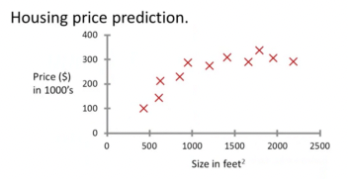

##Regression Problem: predict continuous valued label
Suppose we have a training dataset and each data is represented as (x, y).
In Regression Problem, x ∈X is the feature and y∈Y is the continuous valued label.



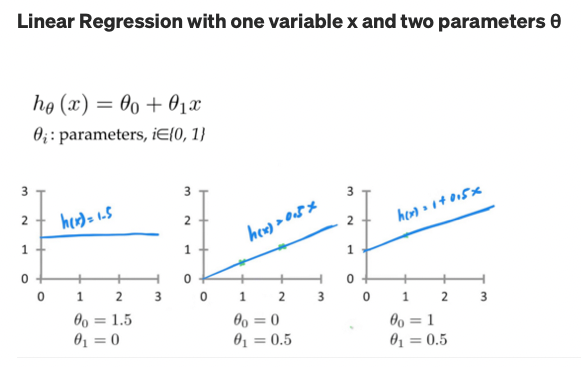

After applying Learning Algorithm, our model will learn a hypothesis function h: X → Y so that h(x) is a ‘good’ predictor for the corresponding value of y.


Example: Housing Price Prediction!

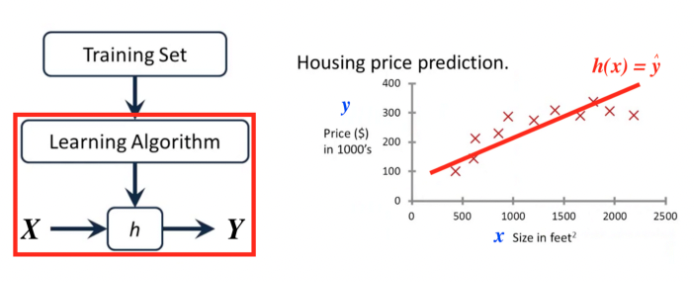

## Cost (Error; Loss; Objective) Function

The accuracy of Hypothesis Function can be measured by using Cost Function.


Mean Squared error Function, which is one of the Cost Function


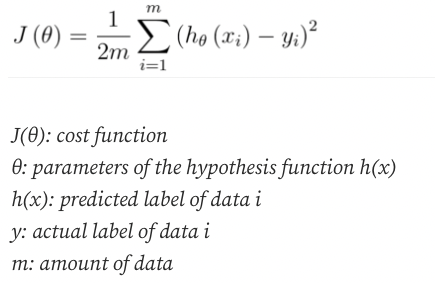

:`Minimize the Cost Function!!!`

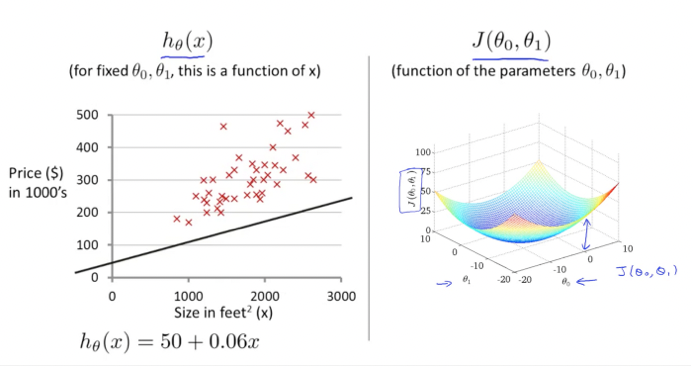

## Gradient Descent Algorithm

The way to minimize the cost function

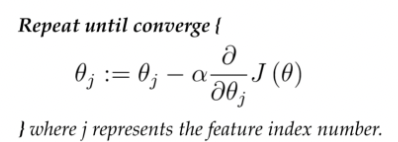

## Learning Rate
α == Learning Rate

If α is too small, Gradient Descent is slow.

If α is too large, Gradient Descent may overshoot minimum and not converge.

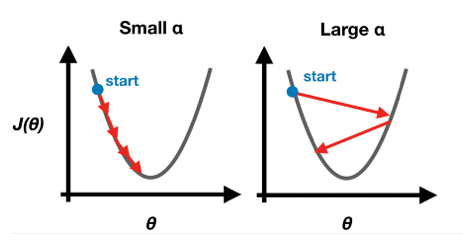

## Overall
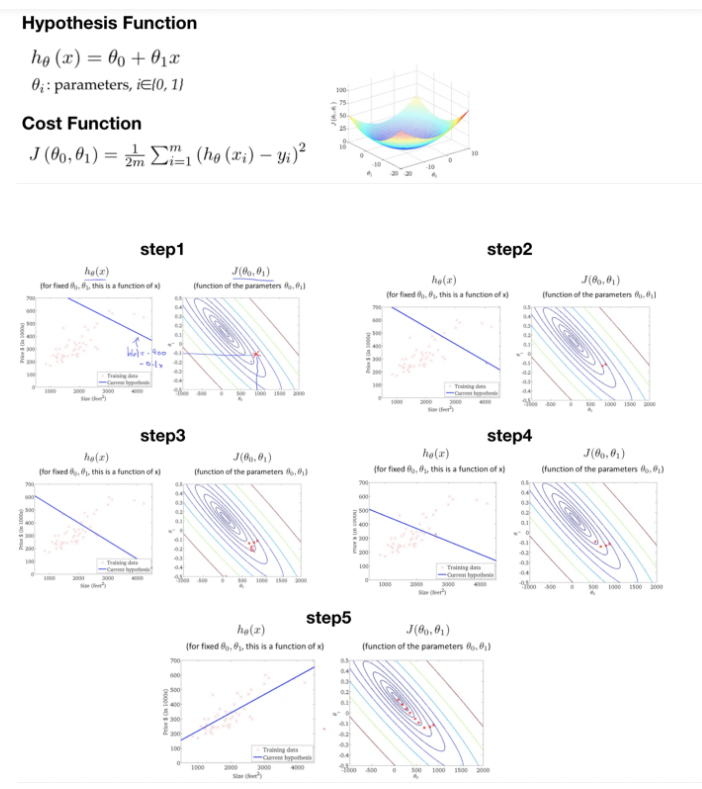

In [ ]:
#Sample Dataset
import torch

# Input Variant == x, Output(label) == y
x = torch.FloatTensor([[1], [2], [3]])  # Feet       1feet 3 2feet 6 3feet 9  y= 3x  (model)
y = torch.FloatTensor([[3], [6], [9]])   #House Price

#Parameters Y = theta_1 * x + theta_2

theta_1 = torch.zeros(1, requires_grad = True)
theta_2 = torch.zeros(1, requires_grad = True)

#Linear Hypothesis
hypothesis = theta_1 * x + theta_2    ## ---> We want the model to be tuned (theta_1 == 0.3, theta_2 = 10)

In [ ]:
#Cost Function MSE
def cost_function(Prediction, Label):
  return torch.mean((Prediction - Label) ** 2)

In [ ]:
optimizer = torch.optim.SGD([theta_1, theta_2], lr=0.01)

In [ ]:

epochs = 5000
for epoch in range(epochs):
  p = theta_1 * x + theta_2
  loss = cost_function(p, y)
  optimizer.zero_grad()   # 2 epoch 부터 해당
  loss.backward()
  optimizer.step() #SGD
  if epoch % 100 == 0:
          print('Epoch {:4d}/{} theta_1: {:.3f}, theta_2: {:.3f} Loss: {:.6f}'.format(
              epoch, epochs, theta_1.item(), theta_2.item(), loss.item()
          ))

Epoch    0/5000 theta_1: 0.280, theta_2: 0.120 Loss: 42.000000
Epoch  100/5000 theta_1: 2.619, theta_2: 0.867 Loss: 0.108384
Epoch  200/5000 theta_1: 2.700, theta_2: 0.682 Loss: 0.066975
Epoch  300/5000 theta_1: 2.764, theta_2: 0.536 Loss: 0.041386
Epoch  400/5000 theta_1: 2.815, theta_2: 0.421 Loss: 0.025574
Epoch  500/5000 theta_1: 2.854, theta_2: 0.331 Loss: 0.015803
Epoch  600/5000 theta_1: 2.886, theta_2: 0.260 Loss: 0.009765
Epoch  700/5000 theta_1: 2.910, theta_2: 0.205 Loss: 0.006034
Epoch  800/5000 theta_1: 2.929, theta_2: 0.161 Loss: 0.003729
Epoch  900/5000 theta_1: 2.944, theta_2: 0.126 Loss: 0.002304
Epoch 1000/5000 theta_1: 2.956, theta_2: 0.099 Loss: 0.001424
Epoch 1100/5000 theta_1: 2.966, theta_2: 0.078 Loss: 0.000880
Epoch 1200/5000 theta_1: 2.973, theta_2: 0.061 Loss: 0.000544
Epoch 1300/5000 theta_1: 2.979, theta_2: 0.048 Loss: 0.000336
Epoch 1400/5000 theta_1: 2.983, theta_2: 0.038 Loss: 0.000208
Epoch 1500/5000 theta_1: 2.987, theta_2: 0.030 Loss: 0.000128
Epoch 1

### Logistic Regression
Medium from Amber:

https://medium.com/@qempsil0914/courseras-machine-learning-notes-week3-classification-problem-logistic-regression-and-d5792753f8d6

Coursera (Andrew Ng):

https://www.coursera.org/learn/machine-learning#about

# **What is Logistic Regression ?**

In statistics, the (binary) logistic model (or logit model) is a statistical model that models the probability of one event (out of two alternatives) taking place by having the log-odds (the logarithm of the odds) for the event be a linear combination of one or more independent variables ("predictors"). In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (the coefficients in the linear combination). Formally, in binary logistic regression there is a single binary dependent variable, coded by an indicator variable, where the two values are labeled "0" and "1", while the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value). The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function, hence the name.


[Reference - https://en.wikipedia.org/wiki/Logistic_regression]

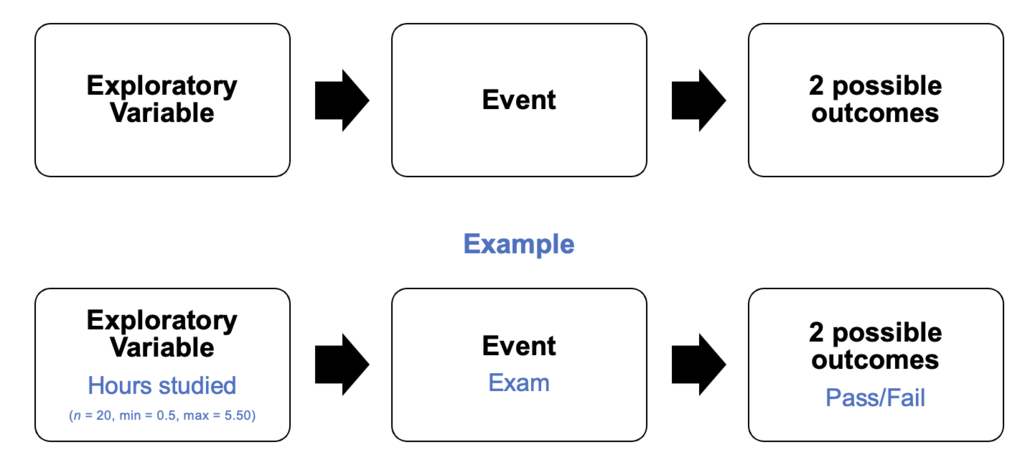

## Classification Problem

### Hypothesis function

Since the label type is different from Regression Problem, we should use another hypothesis for solving Classification Problem. Here, we are going to introduce a popular one - Logistic Regression


### Logistic Regression (== Sigmoid Function)

Sigmoid Function maps real numbers into probabilities, range in [0,1]

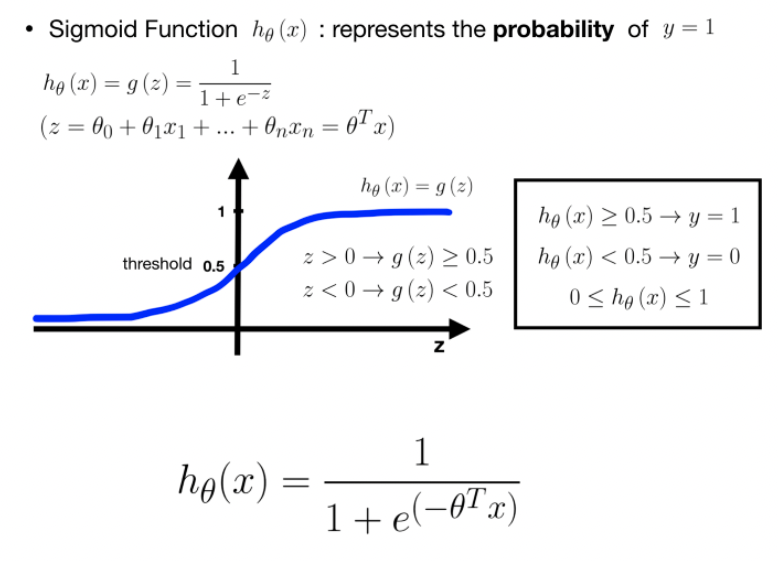

## Example - A Breast Cancer Detection Dataset, each one has two features and one label

1. Preparing Dataset

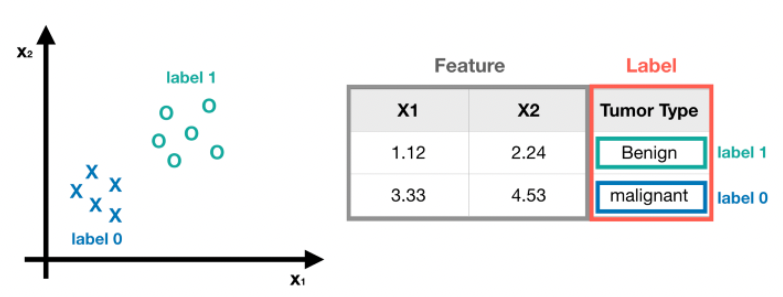

2. Getting Parameters - Get the Parameters of Logistic Regression

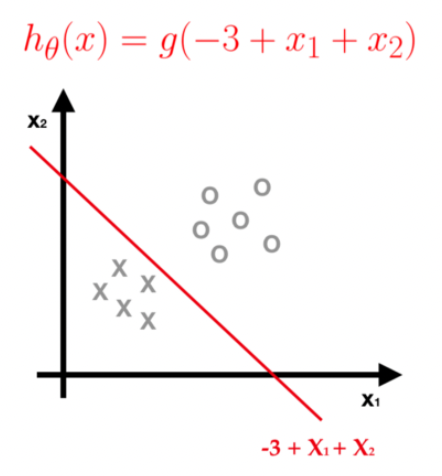

3. Predicting Labels - according to the sigmoid function with learned parameters


If the -3+x1+x2≥0, it means h(x)≥0.5, then we predict this tumor is benign (label 1).
If not, then we predict this tumor is malignant (label 0)

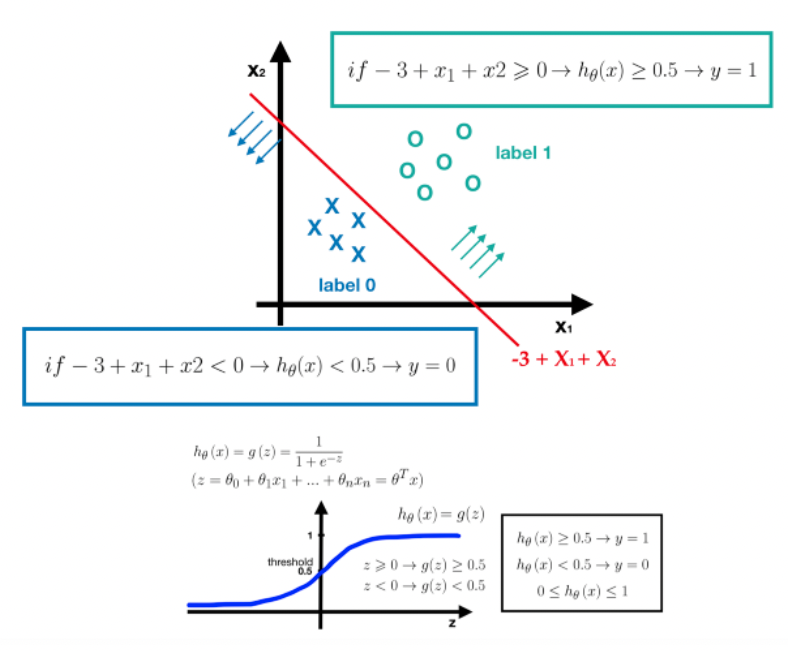

## Actication Function 'Sigmoid'

Pytorch: https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html

Wikipedia: https://en.wikipedia.org/wiki/Sigmoid_function

DeepAi: https://deepai.org/machine-learning-glossary-and-terms/sigmoid-function

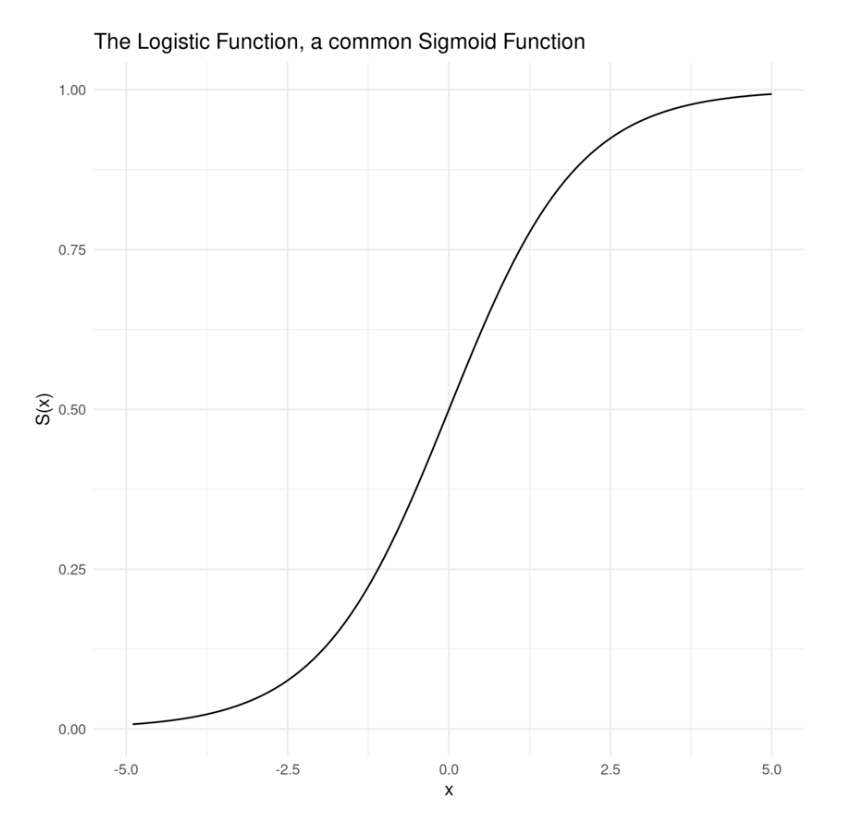


In [ ]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

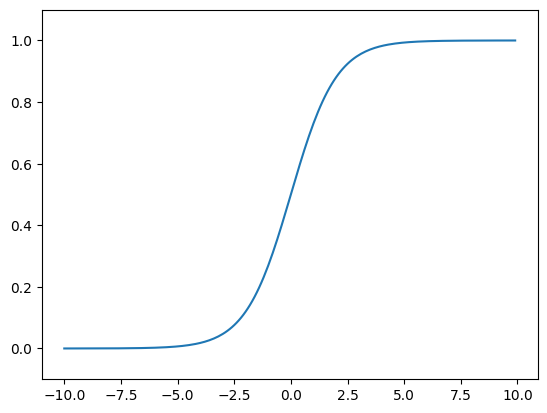

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-10.0, 10.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## Cost Function 'Cross Entropy': The way to compute the error rate between labels and predictions?

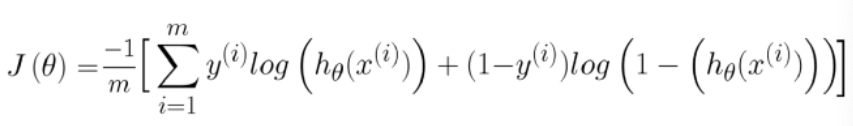

Logistic Regression with Cross Entropy (cost function)

https://jermwatt.github.io/machine_learning_refined/notes/6_Linear_twoclass_classification/6_2_Cross_entropy.html

In [ ]:
def get_cross_entorpy_loss(y_table, t_entropy, t_table):
    y_prob = list(y_table.values())
    t_prob = list(t_table.values())
    y_entropy_list = list(t_prob * -np.log2(y_prob))


    y_entropy_dict = dict(zip(list(t_table.keys()),list(y_entropy_list)))
    y_entropy_val = sum(y_entropy_list)

    cross_entropy_loss = y_entropy_val - t_entropy
    return y_entropy_dict, y_entropy_val, cross_entropy_loss

## Gradient Descend
 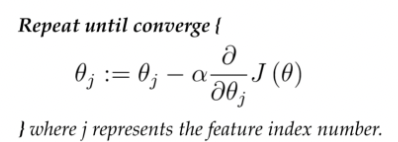

In [ ]:
import torch.nn as nn
import torch

class NN_Model(nn.Module):

    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module
        """
        super(NN_Model, self).__init__()
        self.linear = nn.Linear(1,1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        y_pred = self.linear(x)
        y_pred = self.sigmoid(y_pred)
        return y_pred

In [ ]:
x_data = torch.Tensor([[1.0], [2.0], [3.0], [4.0]])
y_data = torch.Tensor([[0.], [0.], [1.], [1.]])

In [ ]:
model = NN_Model()

In [ ]:
model

NN_Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
criterion = nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [ ]:
# Training loop
epochs = 10000
for epoch in range(epochs):
        # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)

    # Compute and print loss
    loss = criterion(y_pred, y_data)

    if epoch % 1000 == 0:
            print('Epoch {:4d}/{} Loss: {:.6f}'.format(
                epoch, epochs, loss.item()
            ))
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch    0/10000 Loss: 1.496414
Epoch 1000/10000 Loss: 0.533446
Epoch 2000/10000 Loss: 0.394166
Epoch 3000/10000 Loss: 0.316824
Epoch 4000/10000 Loss: 0.268556
Epoch 5000/10000 Loss: 0.235495
Epoch 6000/10000 Loss: 0.211252
Epoch 7000/10000 Loss: 0.192561
Epoch 8000/10000 Loss: 0.177600
Epoch 9000/10000 Loss: 0.165276


In [ ]:
# After training
hour_var = torch.Tensor([[1.0]])
threshold = 0.5
print("predict 1 hour ", 1.0, model(hour_var).data[0][0] > threshold)
hour_var = torch.Tensor([[7.0]])
print("predict 7 hours", 7.0, model(hour_var).data[0][0] > threshold)

predict 1 hour  1.0 tensor(False)
predict 7 hours 7.0 tensor(True)
